<a href="https://colab.research.google.com/github/ManishaDShinde/Python_final_project/blob/main/carprice_prediction_CS632P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Car Price Data Set

---



### Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")

###  Data Loading

In [65]:
carprice = pd.read_csv('https://raw.githubusercontent.com/ManishaDShinde/Python_final_project/main/CarPrice.csv')

### Data Description

In [66]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Information

In [67]:
print('\033[1mRows :\033[0m' , carprice.shape[0])
print('\033[1m\nColumns :\033[0m', carprice.shape[1])
print('\033[1m\nFeatures :\033[0m', carprice.columns.tolist())
print('\033[1m\nNull Values :\033[0m',carprice.isnull().sum().values.sum())

carprice.info()

Rows : 205

Columns : 26

Features : ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Null Values : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205

In [68]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Statical Analysis

In [69]:
import scipy.stats as stats

### Bivariate Analysis (for Feature Selection)

### Distribution of Each Numerical Attribute against Price

In [124]:
print('correlation is very low')
plt.figure(figsize=(8,8))
for i in carprice.columns:
    
    if carprice[i].dtype=='O':
            sns.boxplot(x=carprice[i], y=carprice['price'],data=carprice)
            plt.show()
# There is not much differnce in the prices of cars when the doors are 2 or 4. Hence very low correlation.            

correlation is very low


<Figure size 576x576 with 0 Axes>

To visualize this better lets split the column and also rename the values in it.

In [71]:
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


There are some spelling mistakes in both company name as well as column name so I divided the column into company name and car model name

In [72]:
carprice['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [73]:
x = carprice['CarName'].str.split(" ", expand=True)

In [74]:
carprice['Company'] = x[0].values

In [75]:
carprice['Company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
renault         2
maxda           2
Nissan          1
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Name: Company, dtype: int64

In [76]:
carprice['Company'] = carprice['Company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

In [77]:
carprice['Company'] = carprice['Company'].str.title()

From th below visulizations It is clear how widely the prices vary from company to company. Therefore I used this feature to train the model and predict price based on company names rather than using car name (models).

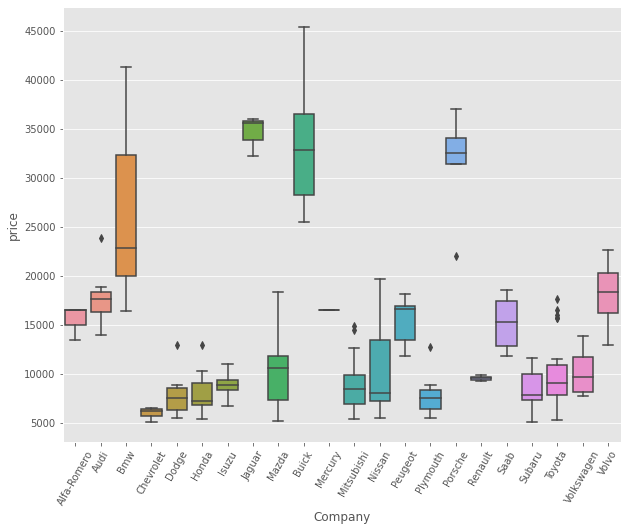

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(carprice['Company'], y=carprice['price'], data=carprice)
plt.xticks(rotation=60)
plt.show()

In [79]:
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Company'],
      dtype='object')

In [80]:
df =carprice.copy()

### Feature Selection

### Pearson Correlation

In [81]:
corr = carprice.corr()

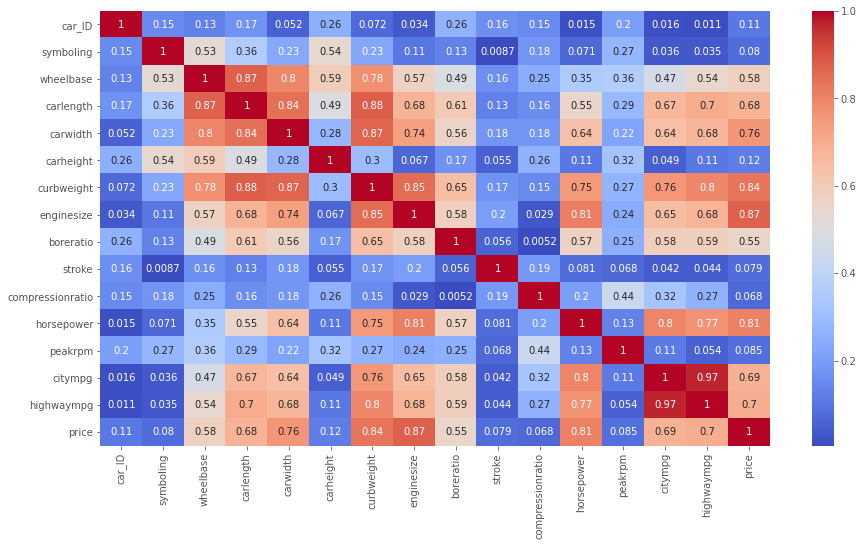

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(corr), annot=True, cmap='coolwarm')

From the relationship underneath network found out that carheight, stroke, compressionratio and peakrpm have no noticable influence on the cost of the cars hence, I have dropped these columns. car_ID column is additionally unessential for the forecast of car cost. From the box plot visualizations over I saw carNames and doornumber trait can too be dropped.





In [83]:
corr.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [84]:
carprice.drop(columns =['car_ID','carheight', 'stroke', 'compressionratio','peakrpm', 'CarName', 'doornumber'],inplace=True)

### Below code Will be used in the Random Classifier

In [85]:
labeel_for_DS = carprice['price'].copy() 

Normalization of Numerical Features

In [86]:
from scipy.stats import zscore
numeric_cols = carprice.select_dtypes(include=[np.number]).columns
carprice[numeric_cols] = carprice[numeric_cols].apply(zscore)

In [87]:
carprice.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Company
0,1.743470,gas,std,convertible,rwd,front,-1.690772,-0.426521,-0.844782,-0.014566,dohc,four,0.074449,mpfi,0.519071,0.174483,-0.646553,-0.546059,0.027391,Alfa-Romero
1,1.743470,gas,std,convertible,rwd,front,-1.690772,-0.426521,-0.844782,-0.014566,dohc,four,0.074449,mpfi,0.519071,0.174483,-0.646553,-0.546059,0.404461,Alfa-Romero
2,0.133509,gas,std,hatchback,rwd,front,-0.708596,-0.231513,-0.190566,0.514882,ohcv,six,0.604046,mpfi,-2.404880,1.264536,-0.953012,-0.691627,0.404461,Alfa-Romero
3,0.938490,gas,std,sedan,fwd,front,0.173698,0.207256,0.136542,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,Audi
4,0.938490,gas,std,sedan,4wd,front,0.107110,0.207256,0.230001,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.275883,-1.106241,-1.273900,0.523668,Audi


In [88]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   curbweight      205 non-null    float64
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  enginesize      205 non-null    float64
 13  fuelsystem      205 non-null    object 
 14  boreratio       205 non-null    float64
 15  horsepower      205 non-null    float64
 16  citympg         205 non-null    float64
 17  highwaympg      205 non-null    flo

### Feature Encoding

In [89]:
for i in carprice.columns:
    if carprice[i].dtype =='O':
        print(i+' : ',carprice[i].unique())

fueltype :  ['gas' 'diesel']
aspiration :  ['std' 'turbo']
carbody :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel :  ['rwd' 'fwd' '4wd']
enginelocation :  ['front' 'rear']
enginetype :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Company :  ['Alfa-Romero' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'
 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


### Manual Encoding

In [90]:
carprice.fueltype = carprice.fueltype.map({'gas': 1,'diesel':0})

In [91]:
carprice.aspiration = carprice.aspiration.map({'std':1, 'turbo':0})

In [92]:
carprice.enginelocation = carprice.enginelocation.map({'front':1,'rear':0})

In [93]:
carprice.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,Company
0,1.743470,1,1,convertible,rwd,1,-1.690772,-0.426521,-0.844782,-0.014566,dohc,four,0.074449,mpfi,0.519071,0.174483,-0.646553,-0.546059,0.027391,Alfa-Romero
1,1.743470,1,1,convertible,rwd,1,-1.690772,-0.426521,-0.844782,-0.014566,dohc,four,0.074449,mpfi,0.519071,0.174483,-0.646553,-0.546059,0.404461,Alfa-Romero
2,0.133509,1,1,hatchback,rwd,1,-0.708596,-0.231513,-0.190566,0.514882,ohcv,six,0.604046,mpfi,-2.404880,1.264536,-0.953012,-0.691627,0.404461,Alfa-Romero
3,0.938490,1,1,sedan,fwd,1,0.173698,0.207256,0.136542,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,Audi
4,0.938490,1,1,sedan,4wd,1,0.107110,0.207256,0.230001,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.275883,-1.106241,-1.273900,0.523668,Audi


### One Hot Encoding

In [94]:
# For Categorical variables having more than two unique values we will hot encode those features
for i in carprice.columns:
    if carprice[i].dtype == 'O' and carprice[i].nunique() >2:
        #print(i, i+'_Dummies')
        carprice.Dummies =pd.get_dummies(carprice[i])
        carprice = pd.concat([carprice, carprice.Dummies], axis=1)
        carprice.drop(columns=[i], inplace=True)

In [95]:
carprice.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Alfa-Romero,Audi,Bmw,Buick,Chevrolet,Dodge,Honda,Isuzu,Jaguar,Mazda,Mercury,Mitsubishi,Nissan,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo
0,1.743470,1,1,1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.743470,1,1,1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.133509,1,1,1,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.938490,1,1,1,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.938490,1,1,1,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
df2=carprice.copy()

### Machine Learning

In [97]:
# Target Variable
y = carprice['price']

#Features
x= carprice.drop(columns=['price'])

### Transforming Features and Target Variables into Arrays

We need to convert both x and y into arrays before applying the Linear Regression Model

In [98]:
# First converting the Features into Dictionary
x = x.to_dict(orient='records')

#Importing vectorizer to convert Dictionary to array
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
x = vec.fit_transform(x).toarray()

#converting our target variable into array
y = np.asarray(y)


 Before splitting the data, I havent removed the outliers.

### Train Test Split

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [100]:
print("xtrain shape : ", xtrain.shape," :: xtest shape  : ", xtest.shape," :: ytrain shape : ", ytrain.shape," :: ytest shape  : ", ytest.shape) 

xtrain shape :  (164, 65)  :: xtest shape  :  (41, 65)  :: ytrain shape :  (164,)  :: ytest shape  :  (41,)


### Linear Regression Model

In [101]:
regressor = LinearRegression()

###  Fitting Linear Regression Model

In [102]:
# Model Training
regressor.fit(xtrain, ytrain)

#Model Prediction
y_pred_linear = regressor.predict(xtest) 

### Linear Regression Evaluation

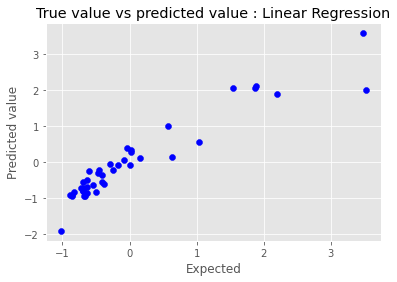

In [103]:
plt.style.use('ggplot')
plt.scatter(ytest, y_pred_linear, c = 'blue') 
plt.xlabel("Expected") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

In [104]:
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, y_pred_linear))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, y_pred_linear))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, y_pred_linear)))


Mean Squared Error is: 0.12910942838286774
Mean Absolute Error is: 0.24083732522012827
Root Mean Squared Error is: 0.35931800453479606


### Accuracy score

In [105]:
regressor.score(xtest, ytest)

0.8961315121069682

In [106]:
regressor.coef_

array([-8.78218272e-02,  1.37482889e-01, -1.41884551e-02, -1.72519170e-02,
        2.47100192e-02,  3.14604809e-01,  9.56899810e-01,  6.48449851e-01,
       -2.08021659e-01, -2.99217151e-01, -3.65505362e-02, -6.94762062e-02,
        2.64575168e-01, -1.09863168e-01, -2.93561060e-01, -3.32123289e-01,
       -9.16948973e-02, -2.23596087e-01, -3.15968543e-01,  7.35189294e-01,
       -2.52890412e-01,  1.95831622e-01, -5.46838229e-01, -2.97886530e-01,
       -1.29155790e-01,  6.65829853e-02, -1.59595648e-01, -1.53385660e-01,
       -1.88308905e-01,  2.02782453e-01, -4.23487209e-02,  2.69240531e-01,
        3.78434205e-01,  1.57581118e-01, -6.72590423e-01,  2.66659215e-01,
       -1.02766512e+00,  3.46570585e-01, -1.38989960e-01,  1.17656459e-01,
       -1.39306431e-02, -3.40388330e-02,  2.10376965e-04, -8.93000595e-02,
        7.19795025e-02,  1.12457446e-01,  1.39306431e-02, -2.23596087e-01,
       -1.02179567e-01,  7.72520675e-02, -1.00117378e-02,  4.80826889e-01,
       -1.72232132e-01,  

### Visualization of Actual vs Predicted Values

In [107]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred_linear.flatten()})

In [108]:
df.head(10)

,Actual,Predicted
0,2.193818,1.874104
1,0.575011,0.999023
2,-0.467756,-0.315031
3,-0.179025,-0.091869
4,1.878610,2.118194
5,-0.687348,-0.818396
6,-0.688728,-0.800839
7,-0.504271,-0.821522
8,-0.386319,-0.615983
9,-0.690359,-0.558527


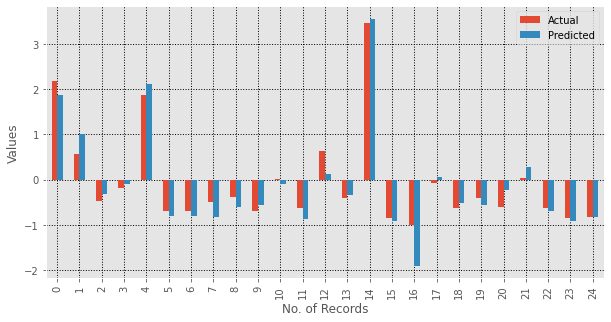

In [109]:
df = df.head(25)
df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle=':', linewidth='0.99', color='black')
plt.xlabel("No. of Records")
plt.ylabel("Values")
plt.show()

### Random Forest Classifier

### Building Classifer for Random Forest

In [110]:
# Categorizing Target variable as High for income >11000 and Low for  <11000
y2 =np.where(labeel_for_DS>11000, 'High',"Low") 

#Manual Encoding of Target Varibale
y2 = np.where(y2=='High',1,0)

### Train Test Split

In [111]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x,y2,test_size=0.3, random_state=42 )

In [112]:
print(xtrain2.shape,xtest2.shape,ytrain2.shape,ytest2.shape)

(143, 65) (62, 65) (143,) (62,)


### Applying Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model = rfc.fit(xtrain2, ytrain2)
y_pred_rfc = rfc.predict(xtest2)

In [114]:
y_pred_rfc

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [115]:
df = pd.DataFrame({'Actual': ytest2.flatten(), 'Predicted': y_pred_rfc.flatten()})
df.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


###  Random Forest Classifier Evaluation:

#### Classification Report

In [116]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest2, y_pred_rfc))
print ("\n \033[1m Accuracy : \033[0m\n",metrics.accuracy_score(ytest2, y_pred_rfc))


  Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.90      1.00      0.95        26

    accuracy                           0.95        62
   macro avg       0.95      0.96      0.95        62
weighted avg       0.96      0.95      0.95        62


  Accuracy : 
 0.9516129032258065


#### Confusion Matrix

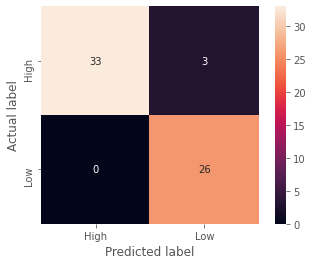

In [117]:
plt.style.use('ggplot')
cf_matrix = confusion_matrix(y_pred_rfc, ytest2)
x_y_labels = ['High','Low']
sns.heatmap(cf_matrix.T, square=True, annot=True, xticklabels=x_y_labels, yticklabels=x_y_labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

### Ridge Regression


In [118]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

### Applying Ridge Regression


In [119]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(xtrain,ytrain);

In [120]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.09068315293486875


### Model Prediction

In [121]:
y_pred_ridge = ridge_regressor.predict(xtest)

### Ridge Regressor Evaluation

In [122]:
print("\033[1mUSING ALPHA =1")
print("\nMean Sqaured Error for Ridge Regression is : \033[0m", metrics.mean_squared_error(ytest, y_pred_ridge))

USING ALPHA =1

Mean Sqaured Error for Ridge Regression is :  0.12570612468469453


### Actual vs Predicted

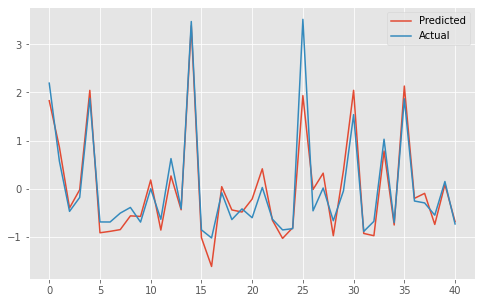

In [123]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(ytest)
plt.legend(["Predicted","Actual"])
plt.show()